In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
tokenizer = Tokenizer()
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#     -O /tmp/sonnets.txt
data = open('/content/wizkid.txt').read()

#get the corpus of all the words, amlist of sentences
corpus = data.lower().split("\n")

#create a dictionary of words(key is the word and value is the token of the word)
tokenizer.fit_on_texts(corpus)

#get toatal number of words
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
# iterate each line in the corpus and generate a token list
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
  #create ngram from each token list
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
    #append the ngram sequence to the input sequence
		input_sequences.append(n_gram_sequence)


# pad sequences 
#find length of longest sequences
max_sequence_len = max([len(x) for x in input_sequences])
#pad all the sequnces so they are the same length
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label from the padded 
#use the last character in the padded sequence as the label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

#one hot encode the label as this is a classification problem
label = ku.to_categorical(label, num_classes=total_words)

In [3]:
model = Sequential()
#embedding layer containing, the total words, number of dimensions to plot the vector of words, 
#size ofinput dim(longest seq - 1(we sub 1 bcos we crop off the last word of each seq to get the label)) 
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
#add lstm with 150 units, added bidirectional to make model more accurate
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
#add 2 dense layer
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
#adam = Adam(lr=0.1)
# categorical bcos of our classifcation problem with an adam optimiser
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 46, 100)           142000    
_________________________________________________________________
bidirectional (Bidirectional (None, 46, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (N

In [4]:
history = model.fit(predictors, label, epochs=70, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10757 samples
Epoch 1/70
10757/10757 [==============================] - 150s 14ms/sample - loss: 6.1320 - acc: 0.0380
Epoch 2/70
10757/10757 [==============================] - 148s 14ms/sample - loss: 5.5382 - acc: 0.0490
Epoch 3/70
10757/10757 [==============================] - 147s 14ms/sample - loss: 5.3356 - acc: 0.0555
Epoch 4/70
10757/10757 [==============================] - 147s 14ms/sample - loss: 5.1869 - acc: 0.0673
Epoch 5/70
10757/10757 [==============================] - 147s 14ms/sample - loss: 5.0633 - acc: 0.0728
Epoch 6/70
10757/10757 [==============================] - 148s 14ms/sample - loss: 4.9484 - acc: 0.0876
Epoch 7/70
10757/10757 [==============================] - 148s 14ms/sample - loss: 4.8308 - acc: 0.1079
Epoch 8/70
10757/10757 [==============================] - 148s 14ms/sample - loss: 4.7250 - acc: 0.1222
Epoch 9/70
10757/10757 [===========================

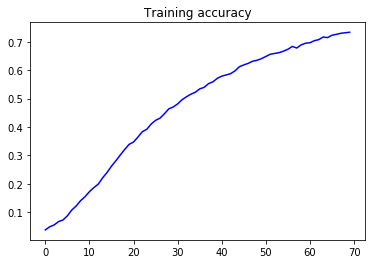

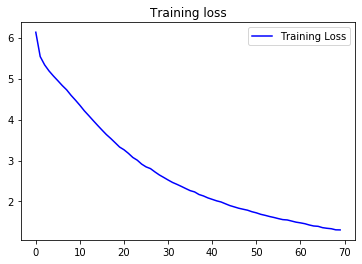

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [7]:

seed_text = "come closer"
next_words = 50
  
 # 
for _ in range(next_words):
  # tokenize the seed word(ignore words not in the corpus)
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
  # padded the sequence so it matches the training set
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
 # make prediction on the words
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
  #reverse lookup on the words to get the predicted words
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

come closer make me sing high note ay by the world when me drop it unfolds before the boat yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah


In [0]:
model.save('wizkid.h5')